# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
from os.path import join
from tqdm import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import os

## 1 Exploring the train.csv metadata file

In [2]:
df = pd.read_csv('./data/train.csv')
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [3]:
df.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [5]:
print(f"Number of unique categories in expert_consensus: {df['expert_consensus'].nunique()}")

Number of unique categories in expert_consensus: 6


In [6]:
df['expert_consensus'].value_counts()

expert_consensus
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: count, dtype: int64

<Axes: title={'center': 'Frequency distribution of expert_consensus'}, xlabel='expert_consensus'>

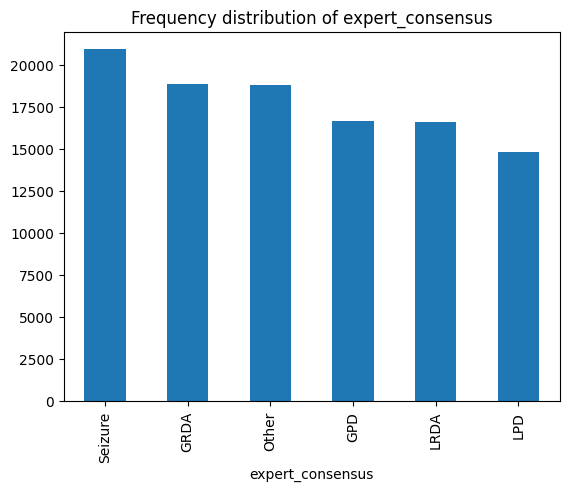

In [7]:
df['expert_consensus'].value_counts().plot(kind='bar', title='Frequency distribution of expert_consensus')

<Axes: title={'center': 'Distribution of votes'}>

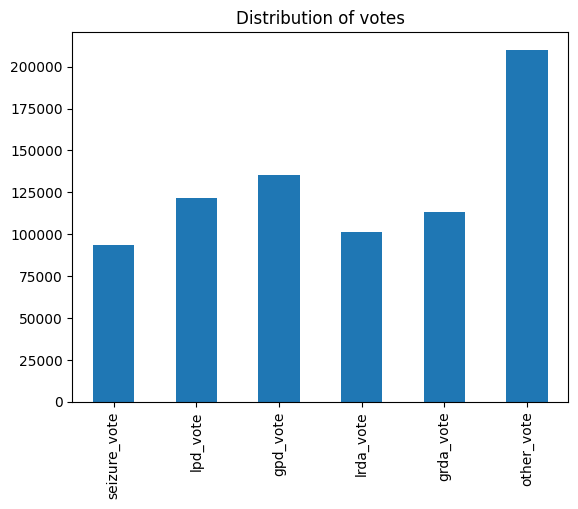

In [8]:
df[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].sum().plot(kind='bar', title='Distribution of votes')

## Observations

### Number of datapoints
There are 106,800 datapoints in the train.csv file with no missing values, which can later be separated into train, validation and test datasets. The 106,800 datapoints seen in train.csv are not the actual EEG or spectrogram data, but rather contains labels (seizure_vote, lpd_vote, gpd_vote, lrda_vote, grda_vote, other_vote) and provides the information (eeg_label_offset_seconds, spectrogram_label_offset_seconds) needed to extract the portions of the raw data (e.g. EEG and spectrograms) that correspond to the labels. Using this information, a dataset with the corresponding EEG, spectrogram data and labels can be generated.

### Labels
In terms of labels, based on the information on maximum and minimum values provided by the .describe() function, it can be seen that they range from 0 to a maximum of 25, hence, doing some normalization on the labels might potentially improve training. Taking a look at the bar plot of the frequency distribution of the categorical feature 'expert_consensus', it can be seen that the distribution of datapoints within each category is not particularly skewed in any direction although not evenly distributed, which may be alright to use for training, validation and testing without modification, but removing some datapoints to ensure an even distribution across categories may prove useful.

## 2 Generating dataset using train.csv and raw data

In [9]:
class HMS_Dataset(Dataset):

    def __init__(self, root_path : str = "./data/") -> None:
        super(HMS_Dataset, self).__init__()
        self.data_root = root_path
        self.train_list = pd.read_csv(join(root_path, "train.csv"))
        self.eeg_sample_freq = 200
        self.spec_sample_freq = 0.5

    def __getitem__(self, index) -> dict:
        row = self.train_list.iloc[index]

        eeg_id = row["eeg_id"]
        eeg_sub_id = row["eeg_sub_id"]
        eeg_label_offset_seconds = row["eeg_label_offset_seconds"]
        spec_id = row["spectrogram_id"]
        spec_sub_id = row["spectrogram_sub_id"]
        spec_label_offset_seconds = row["spectrogram_label_offset_seconds"]
        label_id = row["label_id"]
        patient_id = row["patient_id"]
        expert_consensus = row["expert_consensus"]
        seizure_vote = row["seizure_vote"]
        lpd_vote = row["lpd_vote"]
        gpd_vote = row["gpd_vote"]
        lrda_vote = row["lrda_vote"]
        grda_vote = row["grda_vote"]
        other_vote = row["other_vote"]

        # Read eeg and spectrogram raw data
        eeg = pd.read_parquet(join("./data/train_eegs/", str(eeg_id)+".parquet"))
        spec = pd.read_parquet(join("./data/train_spectrograms/", str(spec_id)+".parquet"))

        # EEG sub-sampling
        start = int(eeg_label_offset_seconds*self.eeg_sample_freq)
        end = int((eeg_label_offset_seconds+50)*self.eeg_sample_freq)
        eeg = eeg.iloc[start:end]
        eeg = np.array(eeg)

        # Spectrogram sub-sampling
        start = int(spec_label_offset_seconds*self.spec_sample_freq)
        end = int((spec_label_offset_seconds+600)*self.spec_sample_freq)
        spec = spec.iloc[start:end].drop(columns=['time'])
        spec = np.array(spec)
        spec = np.expand_dims(spec, axis=0)

        # Labels
        label = np.array([seizure_vote, lpd_vote, gpd_vote, lrda_vote, grda_vote, other_vote])

        return eeg, spec, label

    def __len__(self):
        return self.train_list.shape[0]

In [10]:
data_set = HMS_Dataset()
training_generator = DataLoader(data_set, batch_size=8, shuffle=True, num_workers=6)

## 3 Sample EEGs

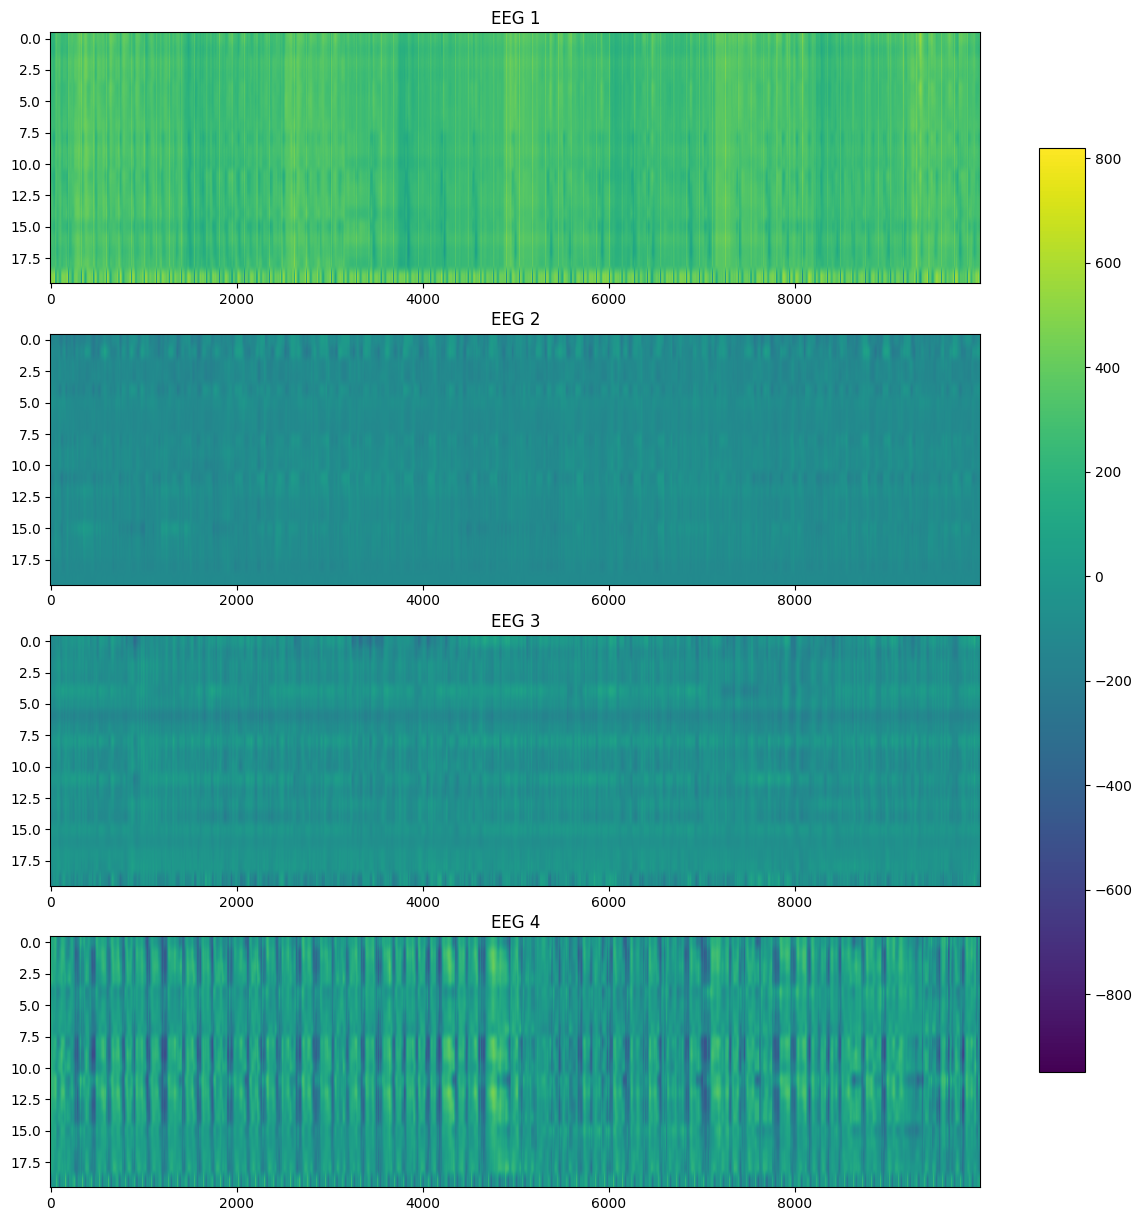

In [11]:
eegs = next(iter(training_generator))[0]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

for i in range(4):
    ax = axes[i]
    im = ax.imshow(eegs[i].T, aspect='auto')
    ax.set_title(f'EEG {i+1}')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
plt.show()

## 4 Sample spectrograms

/tmp/ipykernel_62815/1657425714.py:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3637.)
  im = ax.imshow(specs[i].T, aspect='auto')


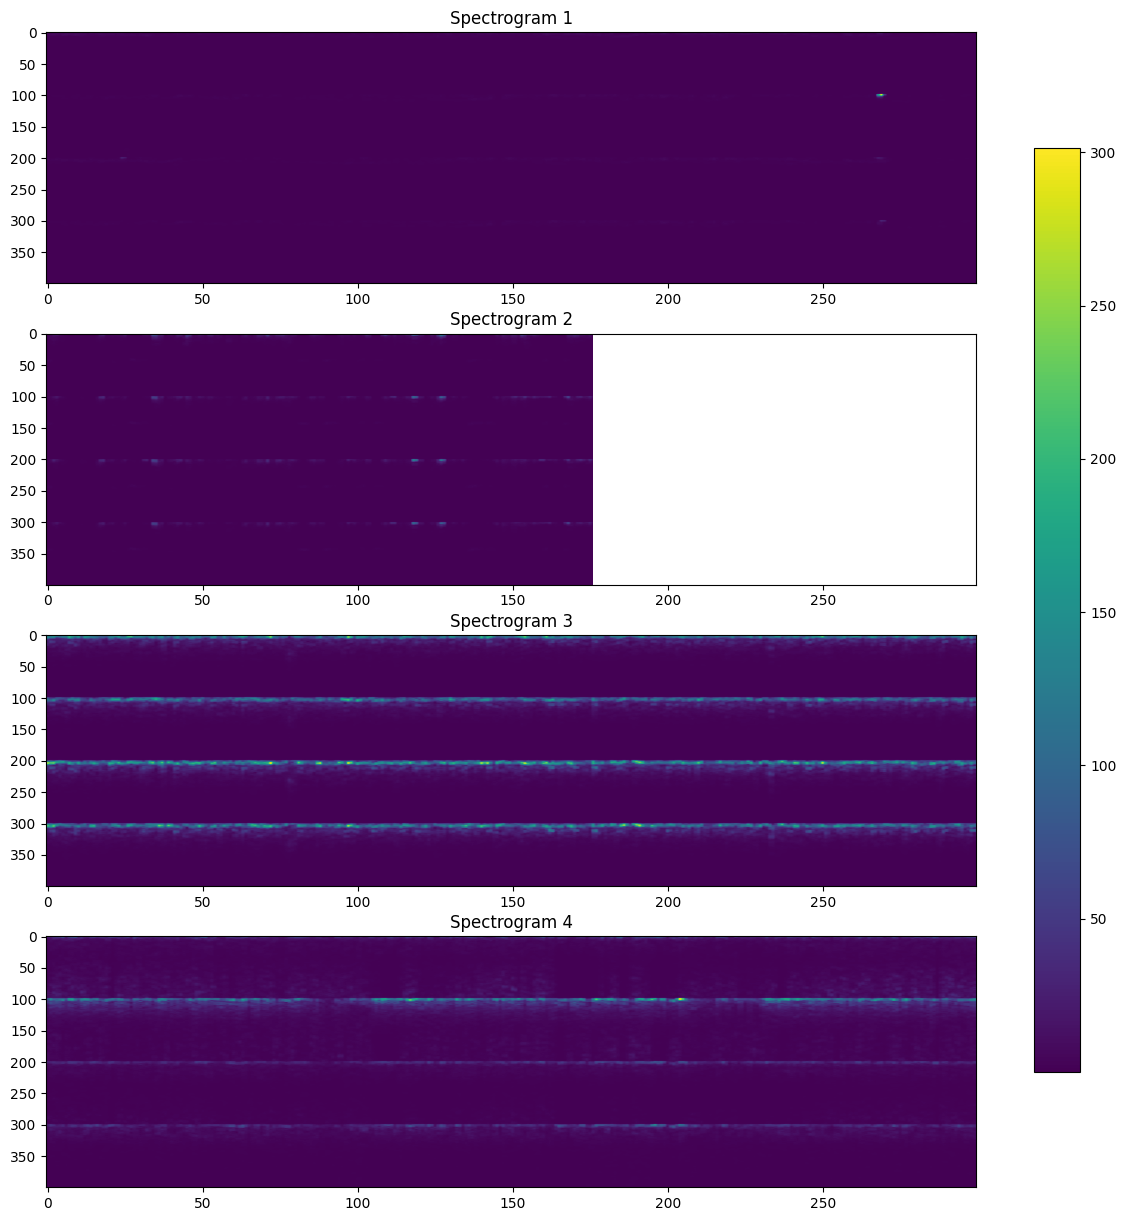

In [12]:
specs = next(iter(training_generator))[1]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

for i in range(4):
    ax = axes[i]
    im = ax.imshow(specs[i].T, aspect='auto')
    ax.set_title(f'Spectrogram {i+1}')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
plt.show()

As seen in sample plots for EEGs and spectrograms, there are missing values present as shown by the white/empty portions of the plots. Hence, analysis of the NaN values present in the data is important and should be dealth with. In addition to that, the range of values present in the data varies a lot for both the EEGs and spectrograms, which is not ideal for training, aka should be normalized before subsequent steps.

## 5 NaN and EEG + spectrogram range check

In [46]:
counter = 0
datapoint_counter = 0
nan_eegs = 0
nan_specs = 0

min_eeg_global = np.inf
min_spec_global = np.inf
max_eeg_global = -np.inf
max_spec_global = -np.inf

with tqdm(iter(training_generator), unit='batch') as train_gen:
    for eeg_batch, spec_batch, label in train_gen:
        for eeg in eeg_batch:
            eeg = eeg.numpy()
            min_eeg = np.min(eeg)
            max_eeg = np.max(eeg)
            if np.isnan(min_eeg):
                nan_eegs += 1
            if min_eeg < min_eeg_global:
                min_eeg_global = min_eeg
            if max_eeg > max_eeg_global:
                max_eeg_global = max_eeg
        for spec in spec_batch:
            spec = spec.numpy()
            min_spec = np.min(spec)
            max_spec = np.max(spec)
            if np.isnan(min_spec):
                nan_specs += 1
            if min_spec < min_spec_global:
                min_spec_global = min_spec
            if max_spec > max_spec_global:
                max_spec_global = max_spec
            datapoint_counter += 1
        counter += 1
        
print(f'Total batches: {counter}, Total datapoints: {datapoint_counter}')
print(f'NaN EEGs: {nan_eegs}, NaN Spectrograms: {nan_specs}')
print(f'Minimum EEG value: {min_eeg_global}, Maximum EEG value: {max_eeg_global}')
print(f'Minmum spectrogram value: {min_spec_global}, Maximum spectrogram value: {max_spec_global}')

100%|██████████| 13350/13350 [10:17<00:00, 21.61batch/s]

Total batches: 13350, Total datapoints: 106800
NaN EEGs: 3542, NaN Spectrograms: 7743
Minimum EEG value: -1408502.25, Maximum EEG value: 1942108.125
Minmum spectrogram value: 0.0, Maximum spectrogram value: 120858360.0


Digging further into the extent of missing values and value ranges of the dataset, it can be seen that there are 3542 EEGs with NaNs and 7743 spectrograms with NaNs. Three potential ways to tackle this would be to replace the NaNs with zeros, replace the NaNs with interpolated values, or to simply drop the entire datapoint. While dropping 3542 EEGs and 7743 spectrograms may seem to be significant, it only represents ~3.3% and ~7.3% of EEGs and spectrograms, which make it a plausible technique to utilize.

## 6 Drop NaN datapoints

In [31]:
class HMS_Dataset_Drop_Nan(Dataset):

    def __init__(self, root_path : str = "./data/") -> None:
        super(HMS_Dataset_Drop_Nan, self).__init__()
        self.data_root = root_path
        self.train_list = pd.read_csv(join(root_path, "train.csv"))
        self.eeg_sample_freq = 200
        self.spec_sample_freq = 0.5

    def __getitem__(self, index) -> dict:
        row = self.train_list.iloc[index]

        eeg_id = row["eeg_id"]
        eeg_sub_id = row["eeg_sub_id"]
        eeg_label_offset_seconds = row["eeg_label_offset_seconds"]
        spec_id = row["spectrogram_id"]
        spec_sub_id = row["spectrogram_sub_id"]
        spec_label_offset_seconds = row["spectrogram_label_offset_seconds"]
        label_id = row["label_id"]
        patient_id = row["patient_id"]
        expert_consensus = row["expert_consensus"]
        seizure_vote = row["seizure_vote"]
        lpd_vote = row["lpd_vote"]
        gpd_vote = row["gpd_vote"]
        lrda_vote = row["lrda_vote"]
        grda_vote = row["grda_vote"]
        other_vote = row["other_vote"]

        # Read eeg and spectrogram raw data
        eeg = pd.read_parquet(join("./data/train_eegs/", str(eeg_id)+".parquet"))
        spec = pd.read_parquet(join("./data/train_spectrograms/", str(spec_id)+".parquet"))

        # EEG sub-sampling
        start = int(eeg_label_offset_seconds*self.eeg_sample_freq)
        end = int((eeg_label_offset_seconds+50)*self.eeg_sample_freq)
        eeg = eeg.iloc[start:end]
        eeg = np.array(eeg)

        # Spectrogram sub-sampling
        start = int(spec_label_offset_seconds*self.spec_sample_freq)
        end = int((spec_label_offset_seconds+600)*self.spec_sample_freq)
        spec = spec.iloc[start:end].drop(columns=['time'])
        spec = np.array(spec)
        spec = np.expand_dims(spec, axis=0)

        # Labels
        label = np.array([seizure_vote, lpd_vote, gpd_vote, lrda_vote, grda_vote, other_vote])

        return eeg, spec, label, eeg_id, spec_id, eeg_sub_id, spec_sub_id

    def __len__(self):
        return self.train_list.shape[0]

In [32]:
data_set_drop_nan = HMS_Dataset_Drop_Nan()
training_generator_drop_nan = DataLoader(data_set_drop_nan, batch_size=8, shuffle=True, num_workers=6)

In [53]:
counter = 0
datapoint_counter = 0
nan_eegs = 0
nan_specs = 0

nan_eeg_ids = []
nan_spec_ids = []

with tqdm(iter(training_generator_drop_nan), unit='batch') as train_gen:
    for eeg_batch, spec_batch, label, eeg_id, spec_id, eeg_sub_id, spec_sub_id in train_gen:
        # EEGs
        for idx, eeg in enumerate(eeg_batch):
            eeg = eeg.numpy()
            min_eeg = np.min(eeg)
            if np.isnan(min_eeg):
                nan_eegs += 1
                nan_eeg_ids.append((int(eeg_id[idx]), int(eeg_sub_id[idx])))
        # Spectrograms
        for idx, spec in enumerate(spec_batch):
            spec = spec.numpy()
            min_spec = np.min(spec)
            if np.isnan(min_spec):
                nan_specs += 1
                nan_spec_ids.append((int(spec_id[idx]), int(spec_sub_id[idx])))
            datapoint_counter += 1
        counter += 1
        
print(f'Total batches: {counter}, Total datapoints: {datapoint_counter}')
print(f'NaN EEGs: {nan_eegs}, NaN Spectrograms: {nan_specs}')
print(f'Number of unique NaN eeg_sub_id: {len(set(nan_eeg_ids))}')
print(f'Number of unique NaN spec_sub_id: {len(set(nan_spec_ids))}')

100%|██████████| 13350/13350 [10:17<00:00, 21.63batch/s]

Total batches: 13350, Total datapoints: 106800
NaN EEGs: 3542, NaN Spectrograms: 7743
Number of unique NaN eeg_sub_id: 3542
Number of unique NaN spec_sub_id: 7743


In [54]:
print(nan_eeg_ids)
print(nan_spec_ids)

[(3043215656, 3), (3360776627, 4), (4126615105, 30), (150469075, 2), (1541467013, 2), (1395781343, 3), (611812685, 2), (150469075, 1), (4041071599, 28), (562038473, 58), (2742099056, 0), (3484053423, 2), (1207174190, 1), (4246823731, 18), (4123942187, 1), (479440144, 84), (3829249262, 0), (524927151, 0), (1647730247, 1), (3701356266, 4), (218040948, 8), (417396395, 29), (1315750207, 1), (3336534073, 0), (3043215656, 0), (2432733737, 0), (2264990385, 7), (1256215657, 14), (10466156, 74), (526375537, 8), (4118449434, 14), (2241263002, 8), (443031384, 1), (610369206, 11), (1944688715, 0), (4139963162, 22), (1574245369, 0), (958932763, 3), (930611371, 18), (2960567707, 4), (3575372862, 48), (3903364984, 8), (1045793518, 8), (827846001, 2), (881425435, 10), (824376040, 13), (788653799, 1), (2567768220, 12), (4070769827, 0), (2560158529, 12), (1375604981, 11), (3013048047, 28), (2205653925, 1), (2491139589, 18), (1404869914, 2), (2264990385, 9), (2946434770, 8), (4136784457, 1), (523936200, 

In [63]:
print(f'Original number of datapoints: {len(df)}')

# Filter NaN EEGs
filter_eeg_df = pd.DataFrame(nan_eeg_ids, columns=['eeg_id', 'eeg_sub_id'])
merged_df = df.merge(filter_eeg_df, on=['eeg_id', 'eeg_sub_id'], how='left', indicator=True)
filtered_eeg_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])
print(f'Number of datapoints after dropping NaN EEGs: {len(filtered_eeg_df)}')

# Filter NaN spectrograms
filter_spec_df = pd.DataFrame(nan_spec_ids, columns=['spectrogram_id', 'spectrogram_sub_id'])
merged_df = filtered_eeg_df.merge(filter_spec_df, on=['spectrogram_id', 'spectrogram_sub_id'], how='left', indicator=True)
filtered_spec_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])
print(f'Number of datapoints after dropping NaN spectrograms: {len(filtered_spec_df)}')

# Save filtered dataframe as .csv
filtered_spec_df.to_csv('./data/train_drop_nan.csv', index=False)

Original number of datapoints: 106800
Number of datapoints after dropping NaN EEGs: 103258
Number of datapoints after dropping NaN spectrograms: 95971


In [64]:
df_2 = pd.read_csv('./data/train_drop_nan.csv')
df_2.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,9.597100e+04,95971.000000,95971.000000,9.597100e+04,95971.000000,95971.000000,9.597100e+04,95971.000000,95971.000000,95971.000000,95971.000000,95971.000000,95971.000000,95971.000000
mean,2.101578e+09,27.075908,122.788342,1.068071e+09,45.450845,545.145117,2.140848e+09,32374.611560,0.874035,1.150806,1.272113,0.942847,1.031187,1.953382
std,1.227401e+09,71.121195,320.207400,6.278837e+08,106.718460,1499.348858,1.242357e+09,18567.197821,1.533904,2.821024,3.135731,2.136734,2.204072,3.598535
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,2.965200e+04,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.033482e+09,1.000000,6.000000,5.254267e+08,2.000000,12.000000,1.064443e+09,16787.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.076321e+09,5.000000,26.000000,1.053316e+09,8.000000,64.000000,2.136929e+09,32316.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.146690e+09,17.000000,84.000000,1.624572e+09,30.000000,412.000000,3.218997e+09,48272.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294888e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


## 7 Summary
Through the exploratory data analysis conducted above, a good understanding of the dataset at hand can be formed, and the following recommendations can be implemented for the next step of data pre-processing before the data is used for training, testing or evaluation to ensure reliable results:

- Normalization of labels
- Normalization of EEG, spectrogram data
- Dropping datapoints for even distribution of datapoints amongs labels (preventing class imbalance)
- Removal of completely empty spectrograms (whole spectrogram is NaN)
- Removal of NaN values within EEG and spectrogram data

Other notes for data pre-processing which may improve performance:
- Experimentation with various normalization schemes
- Experimentation with signal processing techniques (e.g. bandpass filters) could possibly 'clean' noisy signals

## 8 References

[1] https://www.kaggle.com/code/elgardo1/hms-eda-nan-in-sub-spectrograms/notebook

[2] https://www.kaggle.com/code/patrob/check-nan-rows-eeg

[3] https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/data

[4] https://www.kaggle.com/code/patrob/check-nan-spectrograms